# **Predictive Modeling for Rocket Landing Success**  
### *A Machine Learning Approach Using SpaceX Falcon 9 Data* 

In [12]:
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing 

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorihtms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic regression classfication  algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine Classification algorithm
from  sklearn.svm import SVC 

# Desicion Tree Classification algorithm 
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# This provided function is to plot the confusion matrix
def plot_confusion_matrix(y, y_predict):
    """This function plots the confusion matrix"""
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm,annot = True, ax = ax); #annot = True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])



In [14]:
data = pd.read_csv(r'C:\Users\cjchavarria\Desktop\Rocket-Landing-Success-ML\03-eda_and_feature_engineering\dataset_features_ML.csv')

In [15]:
data.head()

,Unnamed: 0,Class,FlightNumber,PayloadMass,Flights,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,1,6123,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,525,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,3,677,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,4,500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,5,3170,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = data.drop(columns=[col for col in data.columns if col.startswith('Unnamed:')])
X.head(3)


,Class,FlightNumber,PayloadMass,Flights,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,1,6123,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,525,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,677,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Y = data[['Class']]

In [18]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


Standardize the data `X` then reassign it to the variable `X` using the transform provided below

In [21]:
transform = preprocessing.StandardScaler().fit_transform(X)
X_norm = transform

In [25]:
X_norm

array([[-1.41421356e+00, -1.71291154e+00, -1.06252757e-04, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.41421356e+00, -1.67441914e+00, -1.18971212e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.41421356e+00, -1.63592675e+00, -1.15741128e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 7.07106781e-01,  1.63592675e+00,  2.01380850e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 7.07106781e-01,  1.67441914e+00,  2.01380850e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 7.07106781e-01,  1.71291154e+00, -5.19044717e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

### Split into train and test sets

We split the data into training and testing data using the function `train_test_split`. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function `GridSearchCV`

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.

In [28]:
Y_test.shape

(18, 1)

In [29]:
Y_train.shape

(72, 1)

In [30]:
X_test.shape

(18, 88)

In [32]:
X_train.shape

(72, 88)

### Logistic Regression

Create a logistic regression object then create a GridSearchCV object `logreg_cv` with cv = 10. Fit the object to find the best parameters from the dictionary  `parameters`.

In [34]:
parameters ={'C': [0.01, 0.1,1],
             'penalty': ['l2'],
             'solver': ['lbfgs']
             }

In [35]:
parameters

{'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

In [ ]:
lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [37]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9035714285714287


In [39]:
best_model = logreg_cv.best_estimator_
print(best_model)

LogisticRegression(C=1)


We can calculate the accuracy on the test data using the method score

In [42]:
best_model = logreg_cv.best_estimator_
# yhat = best_model.predict(X_test)
best_model.score(X_test, Y_test)

0.9444444444444444

Let's look at the confusion matrix:

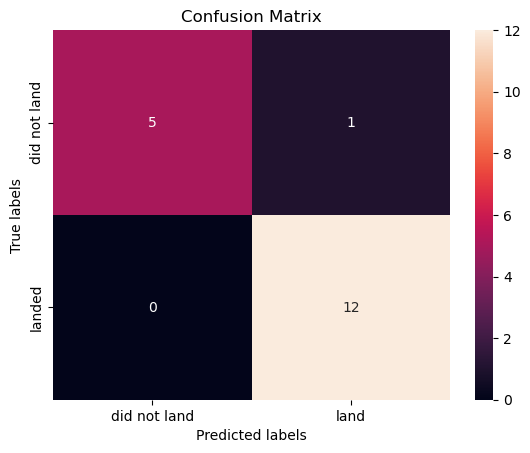

In [43]:
yhat=best_model.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Matrix Axes:
- The Y-axis (vertical) represents the true labels ("did not land" and "landed").
- The X-axis (horizontal) represents the predicted labels by the model.

Values in the matrix:
- **True Negatives (TN)**: The model predicted "did not land" and the true class was "did not land." There are 5 cases.
- **False Positives (FP)**: The model predicted "land" when the true class was "did not land." There is 1 case.
- **False Negatives (FN)**: The model predicted "did not land" when the true class was "landed." There are 0 cases.
- **True Positives (TP)**: The model predicted "land" and the true class was "landed." There are 12 cases.

Conclusion:
The model appears to perform quite well, with only 1 prediction error (FP) and no false negatives.

Overall:
The model seems effective at correctly predicting both classes, with a slight tendency to predict "land" incorrectly in one case.



### Support Vector Machine Model

Create a suppor vector machine object then create `GridSearchCV` object `svm_cv` with cv - 10. Fit the object to find the best parameters from the dictionary `parameters`.